# Homework 1

Hide Assignment Information
Instructions
Working with Individual Classifiers 

This assignment is worth 100 points, which is 20% of the overall course grade, This assignment is to be completed individually. Please consult the course syllabus for a description of our academic honesty policy.

Consider the dataset that you performed EDA on, your task is to do the following classification tasks

* Logistic Regression or Naive Bayes or LDA/QDA
* Support Vector Machine
* Decision Tree
* K-Nearest Neighbor

Now determine the performances using the following 

* Roc Plot
* AUC
* Confusion Matrix
* Accuracy
* Specificity
* Precision
* Recall ( Sensitivity )

Lastly, Calculate the Variance and bias for these algorithms, compare and discuss the difference

In [2]:
library(MASS)
library(ggplot2)
library(GGally)
library(ggcorrplot)
library(e1071)
library(class)
library(dplyr)
library(foreign)
library(nnet)
library(tidyverse)
library(caret)
library(party)
library(pROC)
library(cvms)
library(tibble)
library(mltest)
library(Metrics)
library(boot)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: 'dplyr'


The following object is masked from 'package:MASS':

    select


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ purrr   0.3.4
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()
Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats

In [3]:
options(warn = -1)
data <- read.csv("data/all_seasons.csv")
head(data)

,Player,Pos,Ht,Wt,Exp,Age,G,GS,MP,FG,⋯,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS.G,Season
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,Nick Anderson,SG,198,93,10,32,72,72,29.1,4.3,⋯,1.2,3.6,4.7,1.7,1.3,0.2,1.3,1.6,10.8,2000
2,Jon Barry,SG,193,88,7,30,62,1,20.7,2.6,⋯,0.6,2.0,2.6,2.4,1.2,0.1,1.4,1.7,8.0,2000
3,Tyrone Corbin,SF,198,95,14,37,54,5,17.4,1.6,⋯,0.7,2.3,3.1,1.1,0.7,0.1,0.5,1.8,4.1,2000
4,Tony Delk,PG,185,86,3,26,46,1,14.8,2.6,⋯,0.8,1.1,1.9,1.2,0.8,0.1,0.7,1.3,6.4,2000
5,Vlade Divac,C,216,110,10,31,82,81,29.0,4.7,⋯,2.1,5.9,8.0,3.0,1.3,1.3,2.3,3.1,12.3,2000
6,Lawrence Funderburke,PF,206,104,2,29,75,1,13.7,2.5,⋯,1.3,1.8,3.1,0.4,0.4,0.3,0.5,1.2,6.4,2000


In [4]:
data$Pos <- replace(data$Pos, data$Pos=='C', 5)
data$Pos <- replace(data$Pos, data$Pos=='PF', 4)
data$Pos <- replace(data$Pos, data$Pos=='SF', 3)
data$Pos <- replace(data$Pos, data$Pos=='SG', 2)
data$Pos <- replace(data$Pos, data$Pos=='PG', 1)
data$Pos <- as.factor(data$Pos)

data <- data[,c('Pos','Ht','Wt','AST','X3PA','ORB','BLK')]

str(data)

'data.frame':	11071 obs. of  7 variables:
 $ Pos : Factor w/ 5 levels "1","2","3","4",..: 2 2 3 1 5 4 1 5 2 3 ...
 $ Ht  : int  198 193 198 185 216 206 180 211 196 208 ...
 $ Wt  : int  93 88 95 86 110 104 77 120 86 104 ...
 $ AST : num  1.7 2.4 1.1 1.2 3 0.4 1.7 0.6 0 1.4 ...
 $ X3PA: num  5.5 2.5 0.8 0.9 0.3 0 1.7 0 2 3.6 ...
 $ ORB : num  1.2 0.6 0.7 0.8 2.1 1.3 0.1 2.2 0 1 ...
 $ BLK : num  0.2 0.1 0.1 0.1 1.3 0.3 0 0.8 0 0.1 ...


In [5]:
set.seed(1)

sample <- sample(c(TRUE, FALSE), nrow(data), replace=TRUE, prob=c(0.8,0.2))
train <- data[sample, ]
test <- data[!sample, ]

test.X <- test[2:7]
test.Y <- test[1]

train.X<-train[2:7]
train.Y<-train[1]

message("Shape of test dataframe is ", dim(test)[1], 'x', dim(test)[2])
message("Shape of train dataframe is ", dim(train)[1], 'x', dim(train)[2])

Shape of test dataframe is 2281x7

Shape of train dataframe is 8790x7



## Logit

Since EDA showed, that some features have significant correlation with the target variable, have good distribution and dataset has many observations, I decided to use LOGIT.

In [6]:
logit.fit <- multinom(Pos ~ ., data = train)
logit.pred <- logit.fit %>% predict(test.X)
summary(logit.fit)
population.logit <- multinom(Pos ~ ., data = data)
population.pred <- population.logit %>% predict(test.X)

# weights:  40 (28 variable)
initial  value 14146.959250 
iter  10 value 11264.678368
iter  20 value 10333.366071
iter  30 value 6458.968973
iter  40 value 5646.631461
iter  50 value 5642.032268
iter  60 value 5641.583325
final  value 5641.583154 
converged


Call:
multinom(formula = Pos ~ ., data = train)

Coefficients:
  (Intercept)        Ht         Wt        AST       X3PA      ORB      BLK
2   -51.32427 0.2272984 0.08933343 -0.9690196 0.63144896 1.073986 2.061825
3  -133.06304 0.5909153 0.18620138 -1.4008063 0.62531229 1.819329 2.947120
4  -205.57534 0.8605128 0.35445186 -2.0284141 0.51189160 2.729614 3.673918
5  -286.20298 1.2047126 0.43556042 -2.4483612 0.03091912 2.844946 4.426758

Std. Errors:
   (Intercept)          Ht          Wt        AST       X3PA       ORB
2 0.0387366828 0.004574189 0.009898202 0.04938410 0.03943291 0.2097763
3 0.0026560960 0.005881311 0.012518372 0.06635111 0.04914258 0.2401554
4 0.0041163848 0.007015817 0.014623873 0.08490815 0.05782517 0.2516934
5 0.0009175398 0.007564067 0.015582315 0.10335588 0.07378147 0.2588006
        BLK
2 0.3968997
3 0.4612620
4 0.4830126
5 0.4912126

Residual Deviance: 11283.17 
AIC: 11339.17 

# weights:  40 (28 variable)
initial  value 17818.087129 
iter  10 value 15087.927130
iter  20 value 13554.302194
iter  30 value 7761.321718
iter  40 value 7033.386102
iter  50 value 7027.095245
final  value 7026.651203 
converged


Attention, the block belows computes ROC curves and AUC. It contains a lot of code and takes a lot of kernel memory to process, so I did it only for LOGIT. For the same reason I chose One VS Rest approach in order to save time and space. Here I got only 5 plots, but OvO approach would require 20.

### ROC Curve and AUC

Setting levels: control = 0, case = 1

Setting direction: controls < cases

AUC: 0.879968285171027



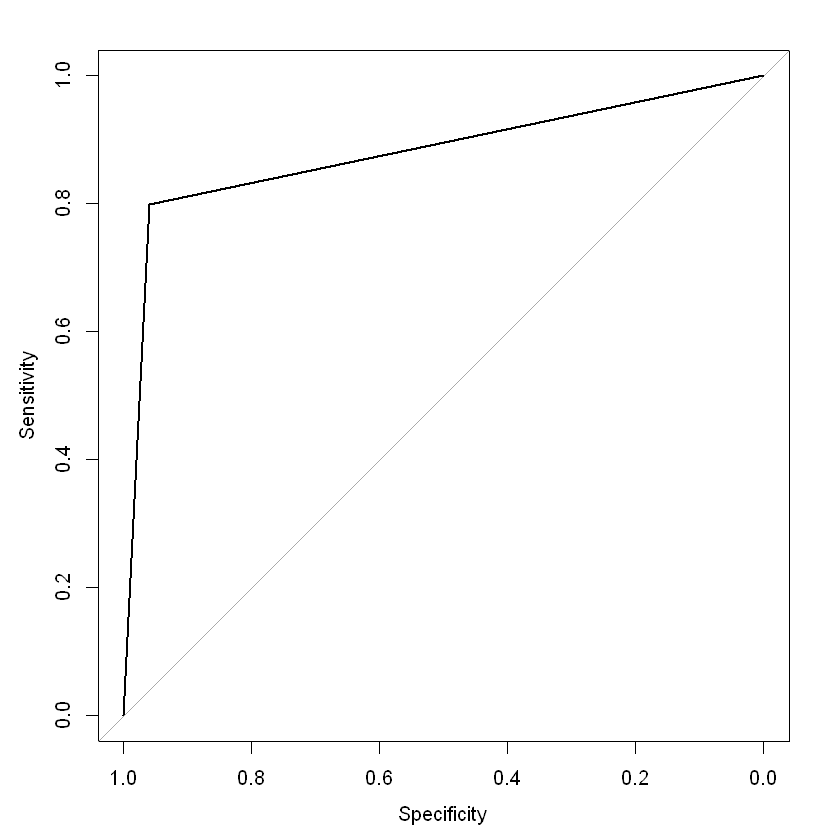

In [7]:
temp_data <- read.csv("data/all_seasons.csv")
temp_data$Pos <- replace(temp_data$Pos, temp_data$Pos=='C', 1)
temp_data$Pos <- replace(temp_data$Pos, temp_data$Pos=='PF', 0)
temp_data$Pos <- replace(temp_data$Pos, temp_data$Pos=='SF', 0)
temp_data$Pos <- replace(temp_data$Pos, temp_data$Pos=='SG', 0)
temp_data$Pos <- replace(temp_data$Pos, temp_data$Pos=='PG', 0)
temp_data$Pos <- as.factor(temp_data$Pos)
temp_data <- temp_data[,c('Pos','Ht','Wt','AST','X3PA','ORB','BLK')]

sample <- sample(c(TRUE, FALSE), nrow(temp_data), replace=TRUE, prob=c(0.8,0.2))
temp_train <- temp_data[sample, ]
temp_test <- temp_data[!sample, ]
temp_test.X <- temp_test[2:7]
temp_test.Y <- temp_test[1]
temp_train.X<-temp_train[2:7]
temp_train.Y<-temp_train[1]

logit5.fit <- glm(Pos~., data=temp_train, family = binomial)
logit5.pred <- predict(logit5.fit, temp_test.X, type="response")
logit5.pred <- ifelse(test=logit5.pred>0.5, yes=1, no=0)

roc5 <- roc(temp_test.Y$Pos, logit5.pred, plot=TRUE)
message("AUC: ", auc(temp_test.Y$Pos, logit5.pred))

Setting levels: control = 0, case = 1

Setting direction: controls < cases

AUC: 0.52266541855184



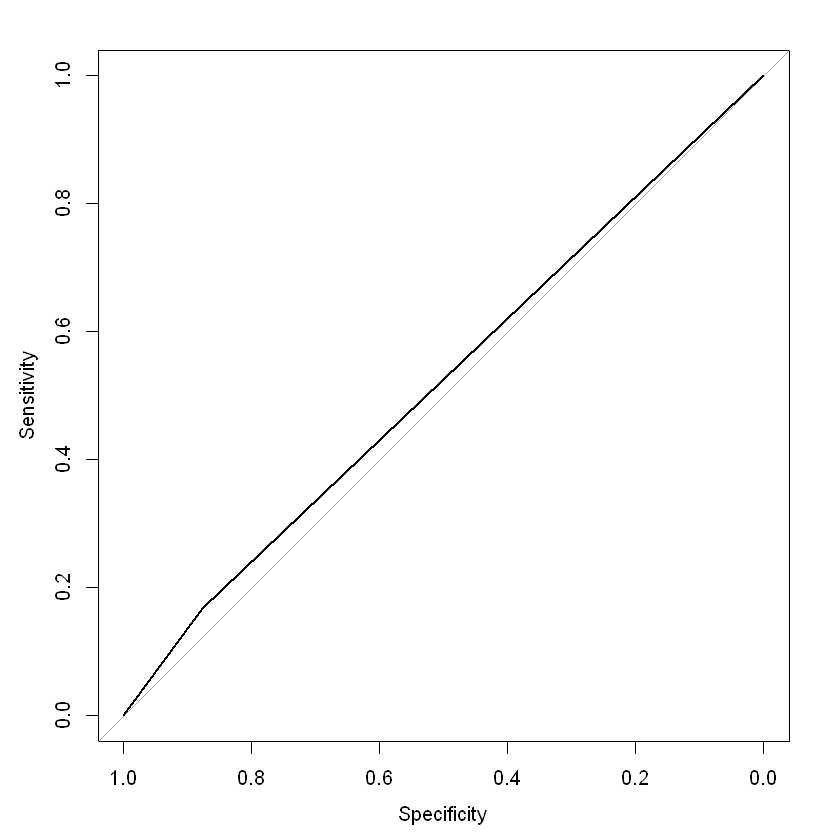

In [8]:
temp_data <- read.csv("data/all_seasons.csv")
temp_data$Pos <- replace(temp_data$Pos, temp_data$Pos=='C', 0)
temp_data$Pos <- replace(temp_data$Pos, temp_data$Pos=='PF', 1)
temp_data$Pos <- replace(temp_data$Pos, temp_data$Pos=='SF', 0)
temp_data$Pos <- replace(temp_data$Pos, temp_data$Pos=='SG', 0)
temp_data$Pos <- replace(temp_data$Pos, temp_data$Pos=='PG', 0)
temp_data$Pos <- as.factor(temp_data$Pos)
temp_data <- temp_data[,c('Pos','Ht','Wt','AST','X3PA','ORB','BLK')]

sample <- sample(c(TRUE, FALSE), nrow(temp_data), replace=TRUE, prob=c(0.8,0.2))
temp_train <- temp_data[sample, ]
temp_test <- temp_data[!sample, ]
temp_test.X <- temp_test[2:7]
temp_test.Y <- temp_test[1]
temp_train.X<-temp_train[2:7]
temp_train.Y<-temp_train[1]

logit4.fit <- glm(Pos~., data=temp_train, family = binomial)
logit4.pred <- predict(logit4.fit, temp_test.X, type="response")
logit4.pred <- ifelse(test=logit4.pred>0.4, yes=1, no=0)

roc4 <- roc(temp_test.Y$Pos, logit4.pred, plot=TRUE)
message("AUC: ", auc(temp_test.Y$Pos, logit4.pred))

Setting levels: control = 0, case = 1

Setting direction: controls < cases

AUC: 0.551485991097146



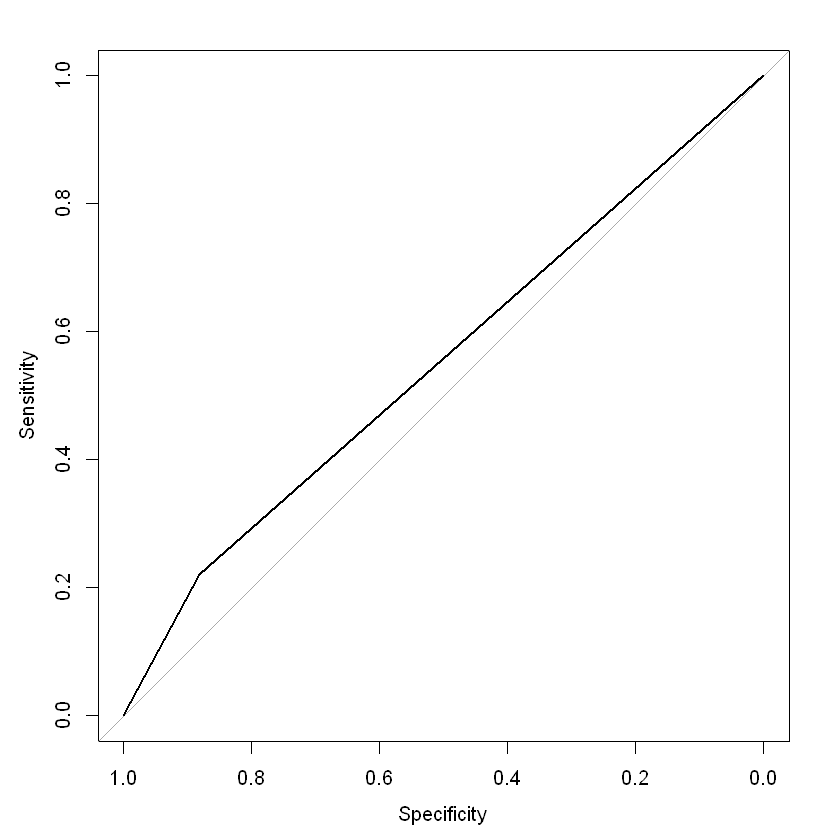

In [9]:
temp_data <- read.csv("data/all_seasons.csv")
temp_data$Pos <- replace(temp_data$Pos, temp_data$Pos=='C', 0)
temp_data$Pos <- replace(temp_data$Pos, temp_data$Pos=='PF', 0)
temp_data$Pos <- replace(temp_data$Pos, temp_data$Pos=='SF', 1)
temp_data$Pos <- replace(temp_data$Pos, temp_data$Pos=='SG', 0)
temp_data$Pos <- replace(temp_data$Pos, temp_data$Pos=='PG', 0)
temp_data$Pos <- as.factor(temp_data$Pos)
temp_data <- temp_data[,c('Pos','Ht','Wt','AST','X3PA','ORB','BLK')]

sample <- sample(c(TRUE, FALSE), nrow(temp_data), replace=TRUE, prob=c(0.8,0.2))
temp_train <- temp_data[sample, ]
temp_test <- temp_data[!sample, ]
temp_test.X <- temp_test[2:7]
temp_test.Y <- temp_test[1]
temp_train.X<-temp_train[2:7]
temp_train.Y<-temp_train[1]

logit3.fit <- glm(Pos~., data=temp_train, family = binomial)
logit3.pred <- predict(logit3.fit, temp_test.X, type="response")
logit3.pred <- ifelse(test=logit3.pred>0.3, yes=1, no=0)

roc3 <- roc(temp_test.Y$Pos, logit3.pred, plot=TRUE)
message("AUC: ", auc(temp_test.Y$Pos, logit3.pred))

Setting levels: control = 0, case = 1

Setting direction: controls < cases

AUC: 0.738981074460589



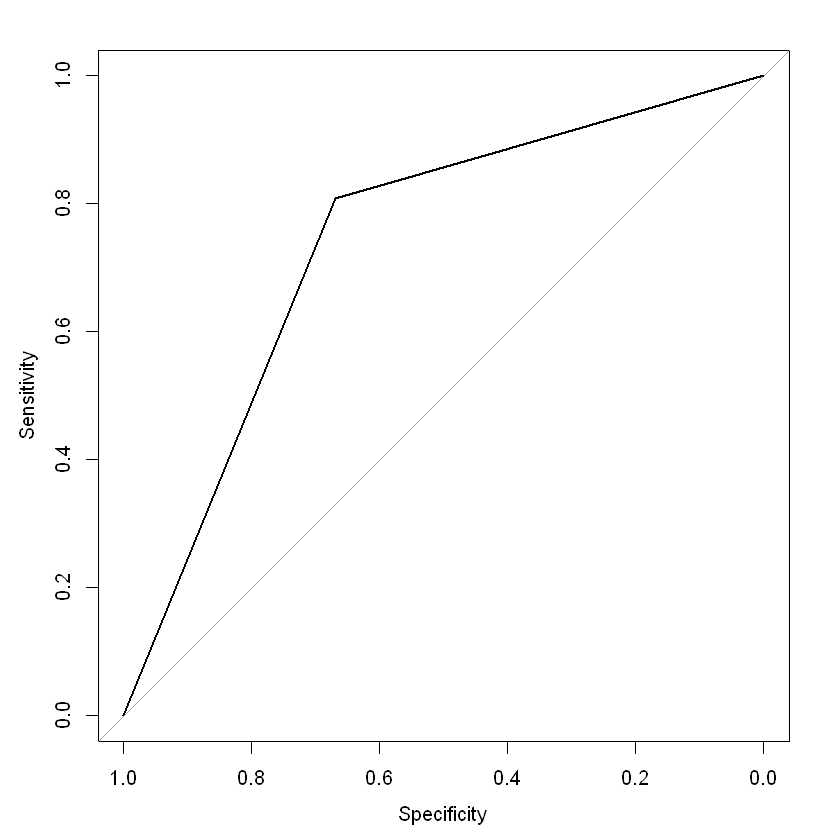

In [10]:
temp_data <- read.csv("data/all_seasons.csv")
temp_data$Pos <- replace(temp_data$Pos, temp_data$Pos=='C', 0)
temp_data$Pos <- replace(temp_data$Pos, temp_data$Pos=='PF', 0)
temp_data$Pos <- replace(temp_data$Pos, temp_data$Pos=='SF', 0)
temp_data$Pos <- replace(temp_data$Pos, temp_data$Pos=='SG', 1)
temp_data$Pos <- replace(temp_data$Pos, temp_data$Pos=='PG', 0)
temp_data$Pos <- as.factor(temp_data$Pos)
temp_data <- temp_data[,c('Pos','Ht','Wt','AST','X3PA','ORB','BLK')]

sample <- sample(c(TRUE, FALSE), nrow(temp_data), replace=TRUE, prob=c(0.8,0.2))
temp_train <- temp_data[sample, ]
temp_test <- temp_data[!sample, ]
temp_test.X <- temp_test[2:7]
temp_test.Y <- temp_test[1]
temp_train.X<-temp_train[2:7]
temp_train.Y<-temp_train[1]

logit2.fit <- glm(Pos~., data=temp_train, family = binomial)
logit2.pred <- predict(logit2.fit, temp_test.X, type="response")
logit2.pred <- ifelse(test=logit2.pred>0.2, yes=1, no=0)

roc2 <- roc(temp_test.Y$Pos, logit2.pred, plot=TRUE)
message("AUC: ", auc(temp_test.Y$Pos, logit2.pred))

Setting levels: control = 0, case = 1

Setting direction: controls < cases

AUC: 0.939267089499648



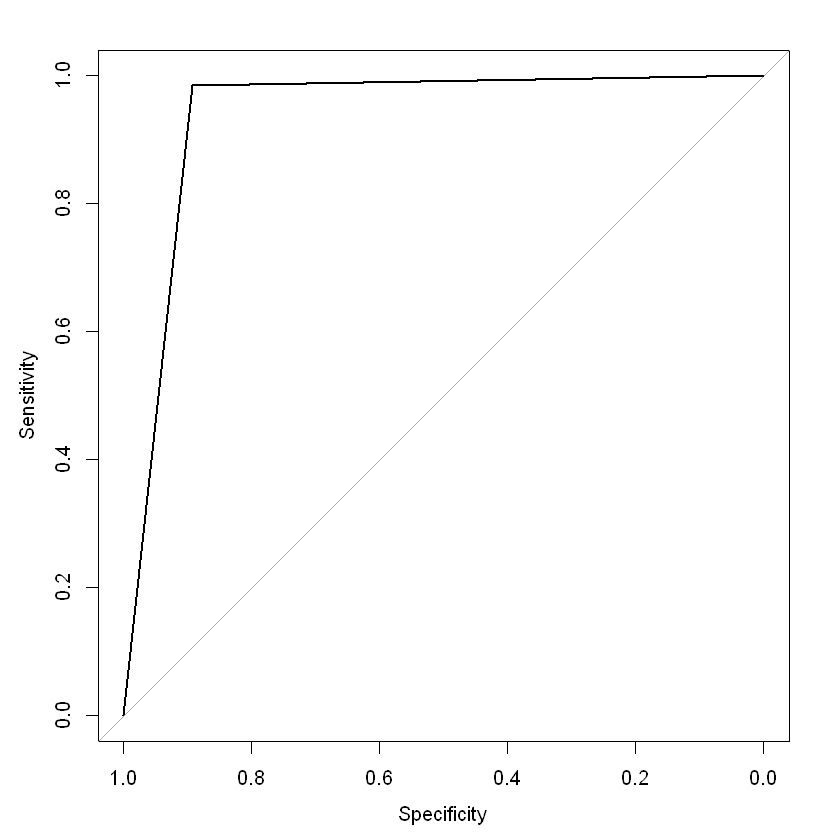

In [11]:
temp_data <- read.csv("data/all_seasons.csv")
temp_data$Pos <- replace(temp_data$Pos, temp_data$Pos=='C', 0)
temp_data$Pos <- replace(temp_data$Pos, temp_data$Pos=='PF', 0)
temp_data$Pos <- replace(temp_data$Pos, temp_data$Pos=='SF', 0)
temp_data$Pos <- replace(temp_data$Pos, temp_data$Pos=='SG', 0)
temp_data$Pos <- replace(temp_data$Pos, temp_data$Pos=='PG', 1)
temp_data$Pos <- as.factor(temp_data$Pos)
temp_data <- temp_data[,c('Pos','Ht','Wt','AST','X3PA','ORB','BLK')]

sample <- sample(c(TRUE, FALSE), nrow(temp_data), replace=TRUE, prob=c(0.8,0.2))
temp_train <- temp_data[sample, ]
temp_test <- temp_data[!sample, ]
temp_test.X <- temp_test[2:7]
temp_test.Y <- temp_test[1]
temp_train.X<-temp_train[2:7]
temp_train.Y<-temp_train[1]

logit1.fit <- glm(Pos~., data=temp_train, family = binomial)
logit1.pred <- predict(logit1.fit, temp_test.X, type="response")
logit1.pred <- ifelse(test=logit1.pred>0.1, yes=1, no=0)

roc1 <- roc(temp_test.Y$Pos, logit1.pred, plot=TRUE)
message("AUC: ", auc(temp_test.Y$Pos, logit1.pred))

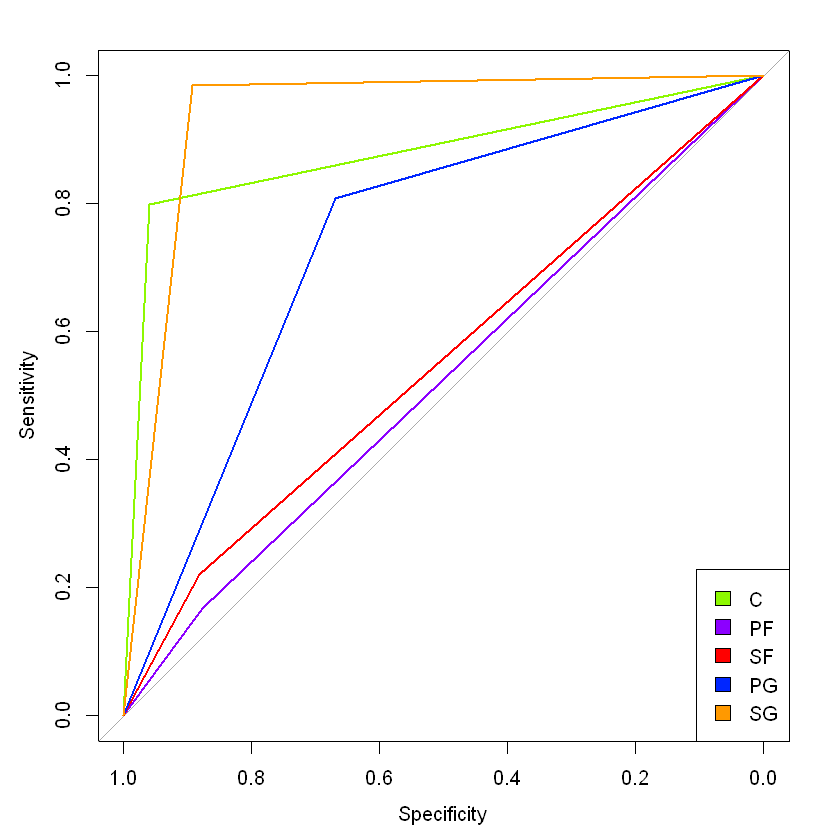

In [12]:
plot(roc5, col='#8df801')
lines(roc4, col='#8c00ff')
lines(roc3, col='#ff0000')
lines(roc2, col='#0026ff')
lines(roc1, col='#ff9900')
legend(x='bottomright',legend=c('C','PF','SF','PG','SG'),fill=c('#8df801','#8c00ff','#ff0000','#0026ff','#ff9900'))

As a result we can notice, that "marginal" positions (Center, Point guard) have the best results. It is because they are on the edges of the distributions. Center players tend to be the highest, the haviest, shoots the least 3's, don't have assists and have the most blocks and rebounds, while Point guards Vice Versa. Other Positions are between them, so their performance differ depending on the strategy, personal stats of the player etc.

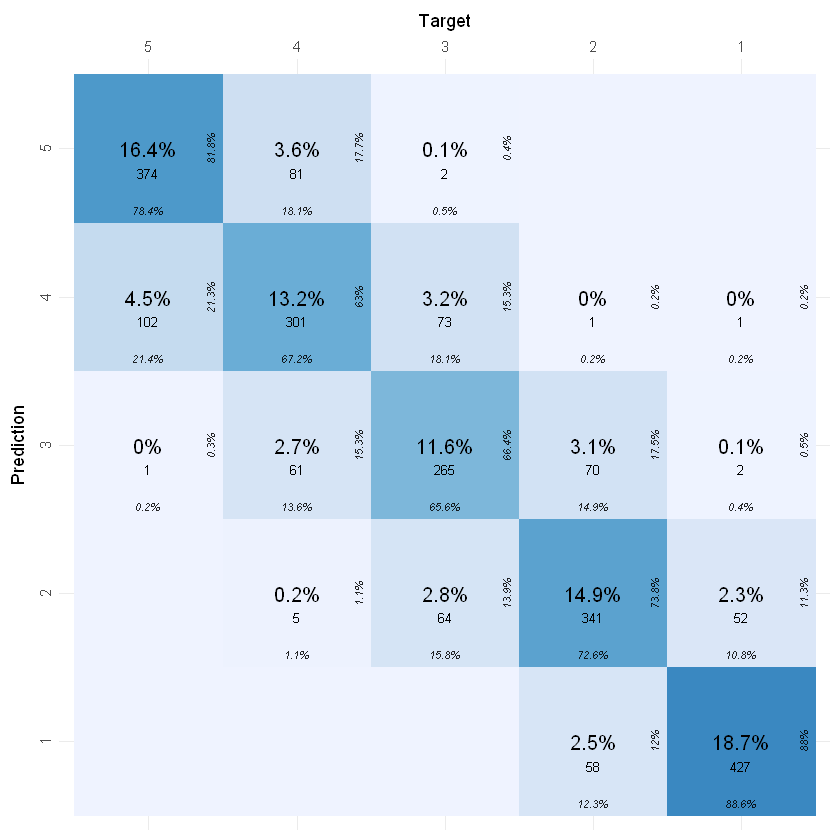

In [13]:
plot_confusion_matrix(confusion_matrix(targets=test.Y$Pos, prediction=logit.pred))

In [14]:
stats <- ml_test(logit.pred, test.Y$Pos, output.as.table = FALSE)
logit.results <- data.frame(
    Accuracy = round(rep(stats$accuracy, 5),4),
    Specificity = round(stats$specificity,4),
    Precision = round(stats$precision,4),
    Sensitivity = round(stats$recall,4),
    Bias = rep(mean(abs(as.integer(population.pred) - as.integer(logit.pred))), 5),
    Variance = rep(var(as.integer(population.pred), as.integer(logit.pred)), 5)
)
message("Accuracy: ", round(stats$accuracy,4)*100, "%\n")
logit.results

Accuracy: 74.88%




,Accuracy,Specificity,Precision,Sensitivity,Bias,Variance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.7488,0.9567,0.8804,0.8859,0.008768084,2.061958
2,0.7488,0.9187,0.7381,0.7255,0.008768084,2.061958
3,0.7488,0.9150,0.6642,0.6559,0.008768084,2.061958
4,0.7488,0.8883,0.6297,0.6719,0.008768084,2.061958
5,0.7488,0.9414,0.8184,0.7841,0.008768084,2.061958


## KNN

In [15]:
n = 50
k_values = seq(1,n,by=1)
accuracy = rep(0,n)

for (i in 1:n){
    knn.pred <- knn(train.X, test.X, cl=train.Y$Pos, k=i)
    accuracy[i] = round(mean(knn.pred == test.Y$Pos),3)*100
}

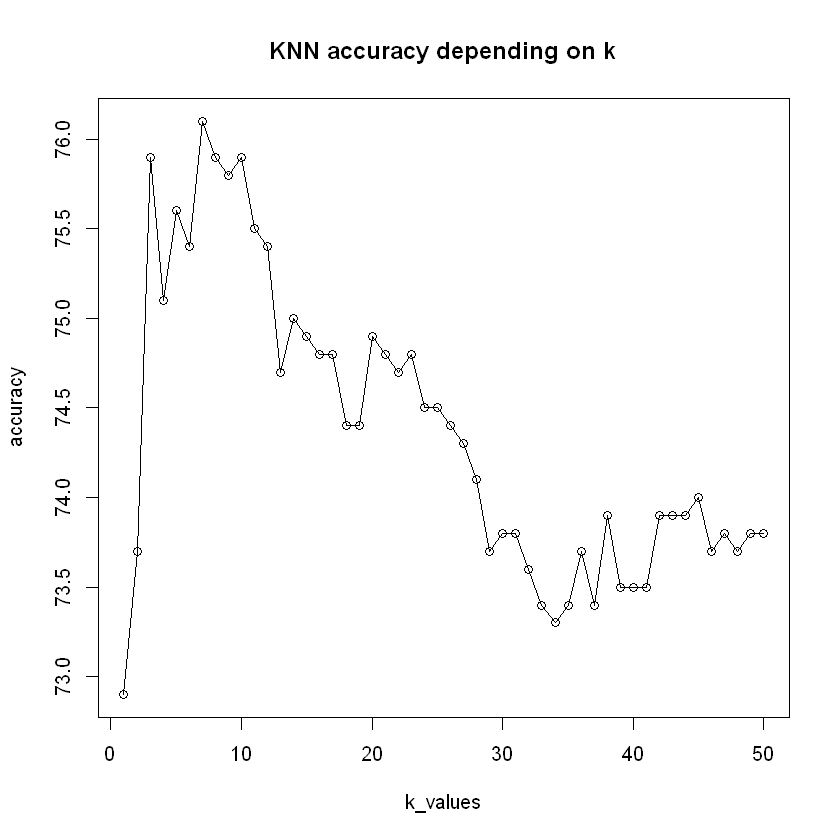

In [16]:
plot(k_values, accuracy, type="o", main="KNN accuracy depending on k", ylim=c(min(accuracy),max(accuracy)))

Very flexible model with $k=7$ shows the best results. I will use it in further computations.

In [17]:
knn.pred <- knn(train.X, test.X, cl=train.Y$Pos, k=7)
population.knn <- knn(data[2:7], test.X, cl=data$Pos, k=7)

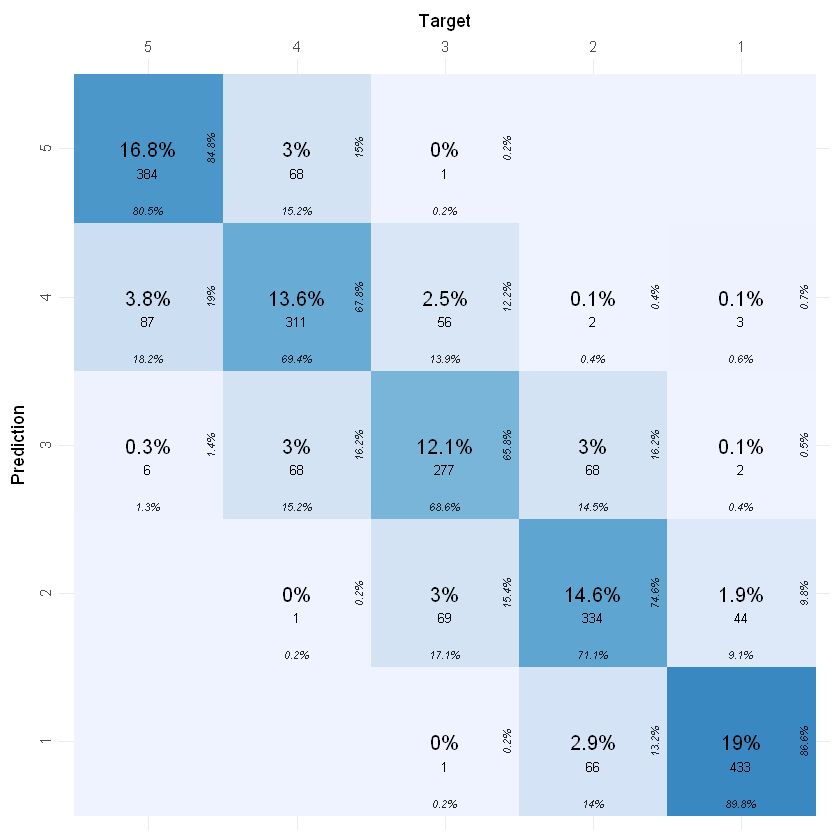

In [18]:
plot_confusion_matrix(confusion_matrix(targets=test.Y$Pos, prediction=knn.pred))

In [19]:
stats <- ml_test(knn.pred, test.Y$Pos, output.as.table = FALSE)
knn.results <- data.frame(
    Accuracy = round(rep(stats$accuracy, 5),4),
    Specificity = round(stats$specificity,4),
    Precision = round(stats$precision,4),
    Sensitivity = round(stats$recall,4),
    Bias = rep(mean(abs(as.integer(population.knn) - as.integer(knn.pred))), 5),
    Variance = rep(var(as.integer(population.knn), as.integer(knn.pred)), 5)
)
message("Accuracy: ", round(stats$accuracy,4)*100, "%\n")
knn.results

Accuracy: 76.24%




,Accuracy,Specificity,Precision,Sensitivity,Bias,Variance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.7624,0.9512,0.8660,0.8983,0.0837352,2.02338
2,0.7624,0.9250,0.7455,0.7106,0.0837352,2.02338
3,0.7624,0.9103,0.6580,0.6856,0.0837352,2.02338
4,0.7624,0.9061,0.6776,0.6942,0.0837352,2.02338
5,0.7624,0.9515,0.8477,0.8050,0.0837352,2.02338


## Decision Tree

In [20]:
tree <- ctree(Pos~., data=train)
tree
population.tree <- ctree(Pos~., data=data)


	 Conditional inference tree with 109 terminal nodes

Response:  Pos 
Inputs:  Ht, Wt, AST, X3PA, ORB, BLK 
Number of observations:  8790 

1) Ht <= 190; criterion = 1, statistic = 6935.294
  2) AST <= 4.2; criterion = 1, statistic = 92.893
    3) X3PA <= 6.3; criterion = 1, statistic = 117.591
      4) X3PA <= 3.1; criterion = 1, statistic = 93.152
        5) Ht <= 188; criterion = 1, statistic = 51.854
          6) AST <= 1.5; criterion = 0.999, statistic = 13.946
            7) Wt <= 85; criterion = 0.984, statistic = 9.002
              8)*  weights = 164 
            7) Wt > 85
              9)*  weights = 94 
          6) AST > 1.5
            10) ORB <= 0.4; criterion = 0.996, statistic = 11.548
              11)*  weights = 293 
            10) ORB > 0.4
              12)*  weights = 75 
        5) Ht > 188
          13) AST <= 1.2; criterion = 1, statistic = 25.357
            14) Wt <= 87; criterion = 0.994, statistic = 13.971
              15)*  weights = 60 
            14

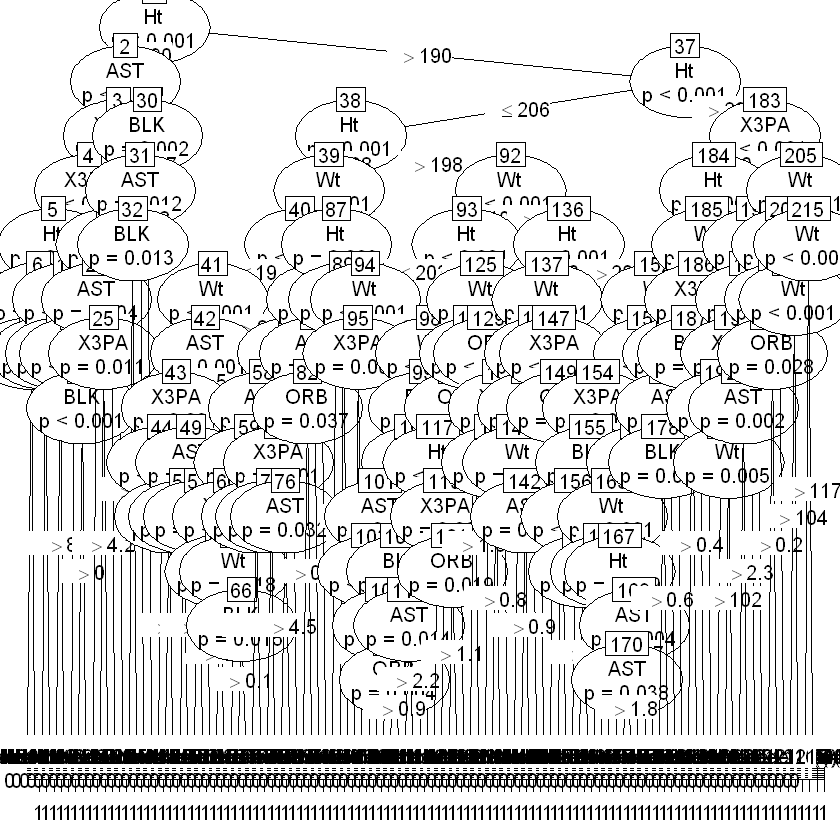

In [21]:
plot(tree)

Damn -_-

In [22]:
tree.pred <- predict(tree, test.X)
population.pred <- predict(population.tree, test.X)

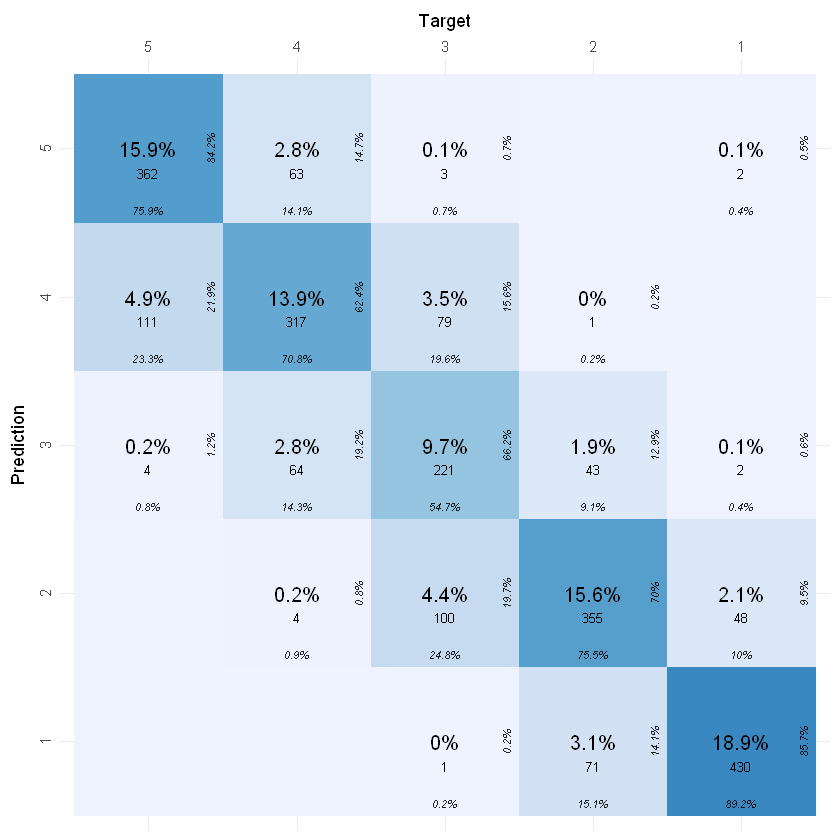

In [23]:
plot_confusion_matrix(confusion_matrix(targets=test.Y$Pos, prediction=tree.pred))

In [24]:
stats <- ml_test(tree.pred, test.Y$Pos, output.as.table = FALSE)
tree.results <- data.frame(
    Accuracy = round(rep(stats$accuracy, 5),4),
    Specificity = round(stats$specificity,4),
    Precision = round(stats$precision,4),
    Sensitivity = round(stats$recall,4),
    Bias = rep(mean(abs(as.integer(population.pred) - as.integer(tree.pred))), 5),
    Variance = rep(var(as.integer(population.pred), as.integer(tree.pred)), 5)
)
message("Accuracy: ", round(stats$accuracy,4)*100, "%\n")
tree.results

Accuracy: 73.87%




,Accuracy,Specificity,Precision,Sensitivity,Bias,Variance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.7387,0.9457,0.8566,0.8921,0.1363437,1.983488
2,0.7387,0.8974,0.7002,0.7553,0.1363437,1.983488
3,0.7387,0.9283,0.6617,0.5470,0.1363437,1.983488
4,0.7387,0.8775,0.6240,0.7076,0.1363437,1.983488
5,0.7387,0.9511,0.8419,0.7589,0.1363437,1.983488


## SVM

In [25]:
svm <- svm(Pos~., data=train,type = 'C-classification',kernel = 'linear')
svm
population.svm <-svm(Pos~., data=data, type = 'C-classification',kernel = 'linear')


Call:
svm(formula = Pos ~ ., data = train, type = "C-classification", kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  5789


In [26]:
svm.pred <- predict(svm, test.X)
population.pred <- predict(population.svm, test.X)

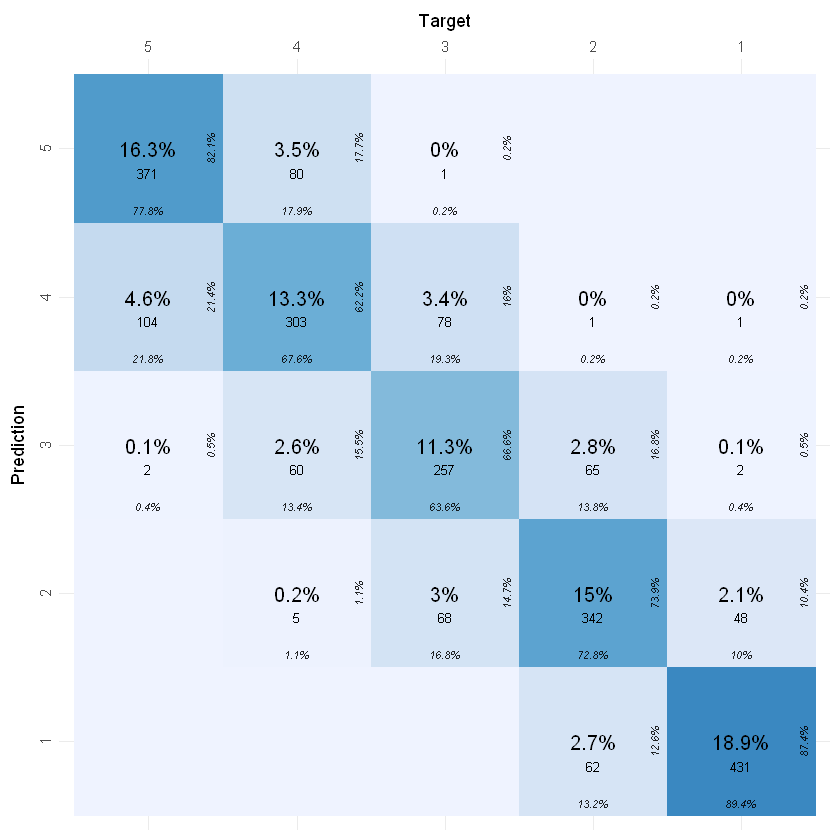

In [27]:
plot_confusion_matrix(confusion_matrix(targets=test.Y$Pos, prediction=svm.pred))

In [28]:
stats <- ml_test(svm.pred, test.Y$Pos, output.as.table = FALSE)
svm.results <- data.frame(
    Accuracy = round(rep(stats$accuracy, 5),4),
    Specificity = round(stats$specificity,4),
    Precision = round(stats$precision,4),
    Sensitivity = round(stats$recall,4),
    Bias = rep(mean(abs(as.integer(population.pred) - as.integer(svm.pred))), 5),
    Variance = rep(var(as.integer(population.pred), as.integer(svm.pred)), 5)
)
message("Accuracy: ", round(stats$accuracy,4)*100, "%\n")
svm.results

Accuracy: 74.7%




,Accuracy,Specificity,Precision,Sensitivity,Bias,Variance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.747,0.9536,0.8742,0.8942,0.007014467,2.069484
2,0.747,0.9184,0.7387,0.7277,0.007014467,2.069484
3,0.747,0.9181,0.6658,0.6361,0.007014467,2.069484
4,0.747,0.8839,0.6222,0.6763,0.007014467,2.069484
5,0.747,0.9427,0.8208,0.7778,0.007014467,2.069484


## Results

For this data KNN (k=7) shows the best results, but generally I think there are possible cases, where other models will lead. Anyways I am glad to get such results, since after running ANOVA in my EDA I was afraid to only one prediction into the model. Also I would like to mention that somehow my LOGIT has Bias = 0. Logit is not very flexible model, so it tends to have high bias, but what happened here - I have no idea, but I like it <3

Since the accuracies are close, so the variances.

There is no reason to commend Specificity and Sensitivity since my classes are not ordered, and I am not afraid to get prediction of +- 1 class. Besides, many players switch positions from season to season. So errors here are not crucial, it is not some heart decease data.

In [29]:
results <- data.frame(
    Model = c("Logit", "KNN", "Decision Tree", "SVM"),
    Accuracy = c(logit.results$Accuracy[1], knn.results$Accuracy[1], tree.results$Accuracy[1], svm.results$Accuracy[1]),
    Bias = c(logit.results$Bias[1], knn.results$Bias[1], tree.results$Bias[1], svm.results$Bias[1]),
    Variance = c(logit.results$Variance[1], knn.results$Variance[1], tree.results$Variance[1], svm.results$Variance[1])
)
results

Model,Accuracy,Bias,Variance
<chr>,<dbl>,<dbl>,<dbl>
Logit,0.7488,0.008768084,2.061958
KNN,0.7624,0.083735204,2.023380
Decision Tree,0.7387,0.136343709,1.983488
SVM,0.7470,0.007014467,2.069484
